In [61]:
#Load data files(titanic_test.csv as test,titanic_train.csv as train)
import pandas as pd
import numpy as np
test=pd.read_csv("titanic_test.csv")
train=pd.read_csv("titanic_train.csv")

In [62]:
#List of column names
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
#Sample of data(head())
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [66]:
#Types of data columns
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [67]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [68]:
#Summary statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


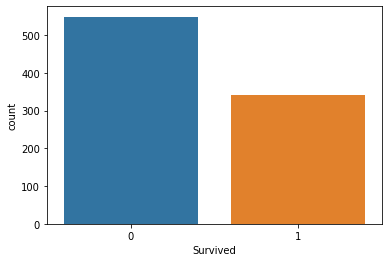

In [70]:
#Give information about survived column use countplot(in seaborn package)
import seaborn as sns
sns.countplot(x='Survived',data=train)

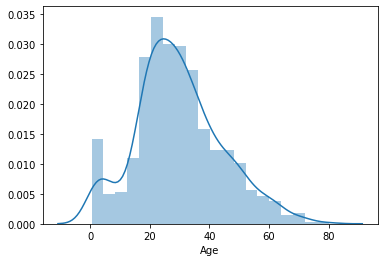

In [71]:
#Give information about Age with distplot
sns.distplot(train['Age'])

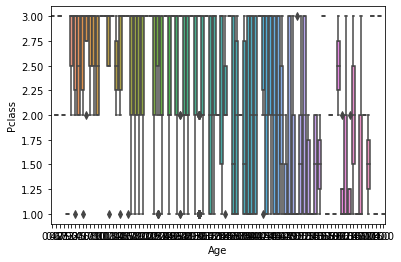

In [154]:
#Give information about Age and Pclass with boxplot(use figsize)
sns.boxplot(x="Age",y="Pclass",data=train,)

In [73]:
#(2)DATA CLEANING AND PREPROCESSING
#Find missing values(for test and train)
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [75]:
#Impute missing values with mean (numerical variables) and mode(categorical variable)
train.fillna(train.mean(),inplace=True)


In [76]:
train.Cabin.fillna(train.Cabin.mode()[0],inplace=True)

In [77]:
#Test data

test.fillna(test.mean(),inplace=True)

In [78]:
test.Cabin.fillna(test.Cabin.mode()[0],inplace=True)

In [88]:
#(3)PREDICTIVE MODELLING
#Remove Cabin column from test and train 
train=train.drop("Cabin",axis=1)
train=train.drop("Name",axis=1)


KeyError: "['Cabin'] not found in axis"

In [89]:
train=train.drop("Ticket",axis=1)

In [82]:
test=test.drop("Cabin",axis=1)
test=test.drop("Name",axis=1)
test=test.drop("Ticket",axis=1)

In [92]:
#Build dummy variables for categorical variables for train and test
train=pd.get_dummies(train)


In [93]:
test=pd.get_dummies(test)

In [169]:
#Create target variable
x=train.drop("Survived",1)
Y=train.Survived

In [170]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [171]:
#(a)LOGISTIC REGRESSION ALGORITHM
#Fit model
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Ayxan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
#Predict values for cv data
predict_y=logmodel.predict(x_test)

In [173]:
#Evaluate accuracy of model and confusion matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [174]:
ac=accuracy_score(y_test,predict_y)
ac

0.7932960893854749

In [175]:
matrix=confusion_matrix(y_test,predict_y)
matrix

array([[99, 14],
       [23, 43]], dtype=int64)

In [176]:
#(b)DECISION TREE ALGORITHM
#Fit model
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [177]:
#Predict values for cv data
predict_1=dt.predict(x_test)
predict_1

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [178]:
#Evaluate accuracy of model
ac1=accuracy_score(y_test,predict_1)
matrix1=confusion_matrix(y_test,predict_1)
ac1

0.7877094972067039

In [179]:
matrix1

array([[93, 20],
       [18, 48]], dtype=int64)

In [180]:
#(c)RANDOM FOREST Classifier ALGORITHM
#Fit model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators = 10,random_state=12)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [181]:
#Predict values for cv data
predict_2=rf.predict(x_test)

In [182]:
#Evaluate accuracy of model
ac2=accuracy_score(y_test,predict_2)
ac2

0.8603351955307262

In [183]:
#(d)SUPPORT VECTOR MACHINE (SVM) ALGORITHM
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [184]:
#Predict values for cv data
predict_3=svm_model.predict(x_test)

In [185]:
#Evaluate accuracy of model
ac3=accuracy_score(y_test,predict_3)
ac3

0.6480446927374302

In [186]:
#(e)NAIVE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [187]:
#Predict values for cv data
predict_4=nb.predict(x_test)

In [188]:
#Evaluate accuracy of model
ac4=accuracy_score(y_test,predict_4)
ac4

0.7932960893854749

In [189]:
#(f)K-NEAREST NEIGHBOR(kNN) ALGORITHM
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [190]:
#Predict values for cv data
predict_5=KNN.predict(x_test)

In [191]:
#Evaluate accuracy of model
ac5=accuracy_score(y_test,predict_5)
ac5

0.6536312849162011

In [192]:
#Apply Xgboostclassifier
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [193]:
predict_6=XGB.predict(x_test)

In [195]:
ac6=accuracy_score(y_test,predict_6)
ac6

0.8547486033519553

In [215]:
X=test.values


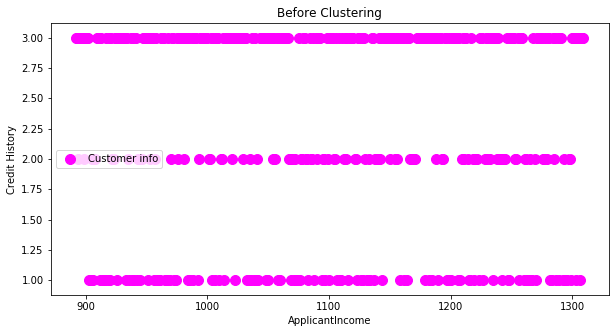

In [225]:
#Clustering
#Visualize data for clustering 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],s=100, c='magenta',label='Customer info' )
plt.title('Before Clustering')
plt.xlabel('ApplicantIncome')
plt.ylabel('Credit History')
plt.legend()
plt.show()


In [218]:
# Elbow method to determine K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

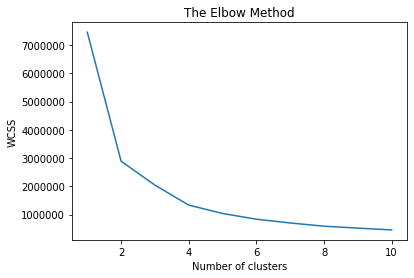

In [219]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [220]:
# fit K_means with founded K
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

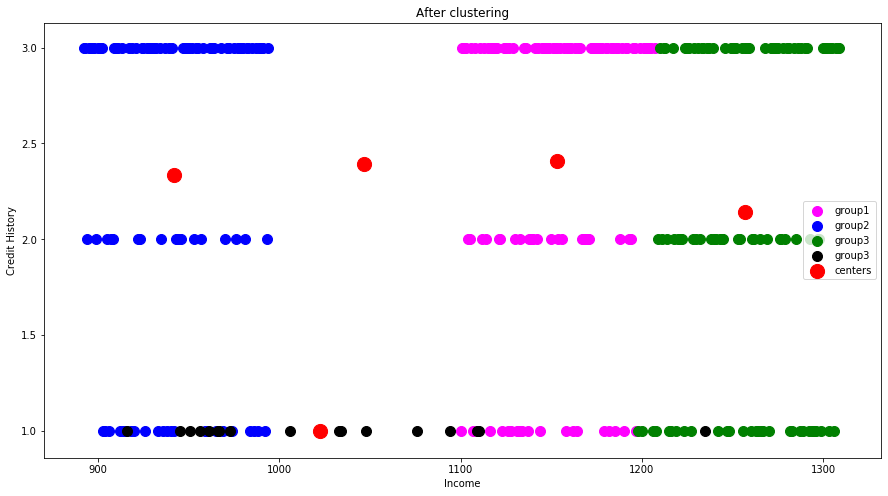

In [221]:
#Lets plot those clusters!

fig = plt.figure(figsize=(15,8))

plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c ='magenta', label='group1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c= 'blue', label='group2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c = 'green', label = 'group3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c = 'black', label = 'group3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label = 'centers')

plt.title('After clustering')
plt.xlabel('Income')
plt.ylabel('Credit History')

plt.legend()
plt.show()

